#### Objective: predict 28 days, from d_1942 to d_1969

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import gc

### Load & Check Datasets

In [2]:
sales = pd.read_csv("INPUT/sales_train_evaluation.csv")
print(sales.shape)
sales.head()

(30490, 1947)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [3]:
#as they ask us to predict 1942-1969 days demand we need this days in sales

for d in range(1942,1970):
    sales["d_" + str(d)] = 0

In [4]:
sales.isnull().sum().any()

False

In [5]:
calendar = pd.read_csv("INPUT/calendar.csv")
print(calendar.shape)
calendar.head()

(1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [6]:
calendar.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [7]:
calendar.fillna("no event", inplace=True)

In [8]:
price = pd.read_csv("INPUT/sell_prices.csv")
print(price.shape)
price.head()

(6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [9]:
price.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

### Downcasting

In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1975 entries, id to d_1969
dtypes: int64(1969), object(6)
memory usage: 459.4+ MB


In [11]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  1969 non-null   object
 8   event_type_1  1969 non-null   object
 9   event_name_2  1969 non-null   object
 10  event_type_2  1969 non-null   object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [12]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [13]:
from skmem import MemReducer

mr = MemReducer()

sales = mr.fit_transform(sales)
calendar = mr.fit_transform(calendar)
price = mr.fit_transform(price)

Memory in: 469.81 MB
Starting integers.
Starting objects.
Memory out: 68.03 MB
Reduction: 85.5%
Memory in: 0.96 MB
Starting integers.
Starting objects.
Memory out: 0.27 MB
Reduction: 71.3%
Memory in: 957.52 MB
Starting integers.
Starting objects.
Memory out: 85.10 MB
Reduction: 91.1%


In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1975 entries, id to d_1969
dtypes: category(5), object(1), uint16(269), uint8(1700)
memory usage: 65.6+ MB


In [15]:
#we will change date to datetime, otherwise pyplot will take it as a string a won't plot it as time series
calendar.date = pd.to_datetime(calendar.date)

calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   uint16        
 2   weekday       1969 non-null   category      
 3   wday          1969 non-null   uint8         
 4   month         1969 non-null   uint8         
 5   year          1969 non-null   uint16        
 6   d             1969 non-null   object        
 7   event_name_1  1969 non-null   category      
 8   event_type_1  1969 non-null   category      
 9   event_name_2  1969 non-null   category      
 10  event_type_2  1969 non-null   category      
 11  snap_CA       1969 non-null   uint8         
 12  snap_TX       1969 non-null   uint8         
 13  snap_WI       1969 non-null   uint8         
dtypes: category(5), datetime64[ns](1), object(1), uint16(2), uint8(5)
memory usage: 60.2+ KB

In [16]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   store_id    category
 1   item_id     category
 2   wm_yr_wk    uint16  
 3   sell_price  float64 
dtypes: category(2), float64(1), uint16(1)
memory usage: 84.9 MB


### Melting & Merging 

In [17]:
#melt will take all id_vars, and the rest will be transpossed in 1 column, which in this case is perfect
sales = pd.melt(sales, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 
                                           'state_id'], var_name = 'd', value_name = 'demand')
print(sales.shape)
sales.head()

(60034810, 8)


,id,item_id,dept_id,cat_id,store_id,state_id,d,demand
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [18]:
sales_cal = pd.merge(sales, calendar, on="d", how="left")

In [19]:
df = pd.merge(sales_cal, price, on=["store_id", "item_id", "wm_yr_wk"], how="left")

In [20]:
#freeing up space
del sales, calendar, price, sales_cal
collected = gc.collect()
print("Garbage Collector collected:", collected, "elements")

Garbage Collector collected: 60 elements


In [21]:
print(df.shape)
df.head()

(60034810, 22)


,id,item_id,dept_id,cat_id,store_id,state_id,d,demand,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,no event,no event,no event,no event,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,no event,no event,no event,no event,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,no event,no event,no event,no event,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,no event,no event,no event,no event,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,no event,no event,no event,no event,0,0,0,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60034810 entries, 0 to 60034809
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            object        
 1   item_id       category      
 2   dept_id       category      
 3   cat_id        category      
 4   store_id      category      
 5   state_id      category      
 6   d             object        
 7   demand        uint16        
 8   date          datetime64[ns]
 9   wm_yr_wk      uint16        
 10  weekday       category      
 11  wday          uint8         
 12  month         uint8         
 13  year          uint16        
 14  event_name_1  category      
 15  event_type_1  category      
 16  event_name_2  category      
 17  event_type_2  category      
 18  snap_CA       uint8         
 19  snap_TX       uint8         
 20  snap_WI       uint8         
 21  sell_price    float64       
dtypes: category(10), datetime64[ns](1), float64(1), object(2), uint1

### Choosing Final Distribution

In [23]:
cat = df.cat_id.value_counts()
cat

FOODS        28294530
HOUSEHOLD    20615430
HOBBIES      11124850
Name: cat_id, dtype: int64

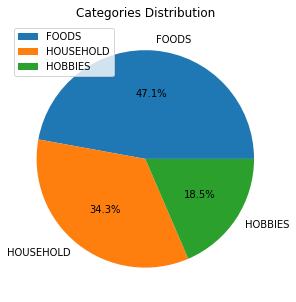

In [24]:
plt.figure(figsize=(15,5))
plt.pie(cat, labels=cat.keys(), autopct='%1.1f%%')
plt.title("Categories Distribution")
plt.legend(loc=2)
plt.show()

In [25]:
store = df.store_id.value_counts()
store

WI_3    6003481
WI_2    6003481
WI_1    6003481
TX_3    6003481
TX_2    6003481
TX_1    6003481
CA_4    6003481
CA_3    6003481
CA_2    6003481
CA_1    6003481
Name: store_id, dtype: int64

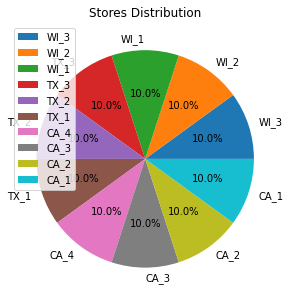

In [26]:
plt.figure(figsize=(15,5))
plt.pie(store, labels=store.keys(), autopct='%1.1f%%')
plt.title("Stores Distribution")
plt.legend(loc=2)
plt.show()

In [27]:
state = df.state_id.value_counts()
state

CA    24013924
WI    18010443
TX    18010443
Name: state_id, dtype: int64

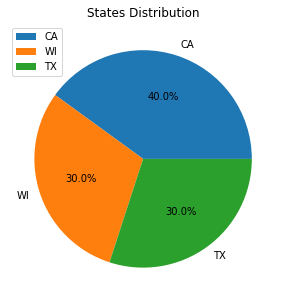

In [28]:
plt.figure(figsize=(15,5))
plt.pie(state, labels=state.keys(), autopct='%1.1f%%')
plt.title("States Distribution")
plt.legend(loc=2)
plt.show()

In [29]:
del cat, state
collected = gc.collect()
print("Garbage Collector collected:", collected, "elements")

Garbage Collector collected: 8570 elements


#### We will divide the final df based in the stores distribution, as it is the most equitable and also we will be able to work fine with the memory usage

In [30]:
print(df.shape)
df.head()

(60034810, 22)


,id,item_id,dept_id,cat_id,store_id,state_id,d,demand,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,no event,no event,no event,no event,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,no event,no event,no event,no event,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,no event,no event,no event,no event,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,no event,no event,no event,no event,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,no event,no event,no event,no event,0,0,0,NaN


In [31]:
dfs_dict = {}
for s in store.keys():
    print("Saving Datasets")
    dfs_dict["df_" + s] = df[df.store_id==s]

for names, values in dfs_dict.items():
    print(names, "size:", values.shape)
    values.to_csv(f"OUTPUT/{names}")

Saving Datasets
Saving Datasets
Saving Datasets
Saving Datasets
Saving Datasets
Saving Datasets
Saving Datasets
Saving Datasets
Saving Datasets
Saving Datasets
df_WI_3 size: (6003481, 22)
df_WI_2 size: (6003481, 22)
df_WI_1 size: (6003481, 22)
df_TX_3 size: (6003481, 22)
df_TX_2 size: (6003481, 22)
df_TX_1 size: (6003481, 22)
df_CA_4 size: (6003481, 22)
df_CA_3 size: (6003481, 22)
df_CA_2 size: (6003481, 22)
df_CA_1 size: (6003481, 22)


In [32]:
del df
collected = gc.collect()
print(collected)

20
